In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from keras.utils.np_utils import to_categorical
import seaborn as sns
from keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
print('Finsihed loading libs')

Finsihed loading libs


In [3]:
fileName= "crops.csv"
cropsDf = pd.read_csv(fileName)
print(cropsDf.shape)
print(cropsDf.columns)

(2200, 8)
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [4]:
cropsDf.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
X = cropsDf.iloc[:,:7].values
y = cropsDf.iloc[:,7:8].values

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [7]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, shuffle = True)

In [9]:
model = Sequential()
model.add(Dense(64, input_dim=7, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(22, activation="softmax"))

In [10]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer = optimizer, metrics=['accuracy'])
print('Finished compiling')
print(model.summary())

Finished compiling
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 22)                1430      
                                                                 
Total params: 6,102
Trainable params: 6,102
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
history = model.fit(X_train, y_train, epochs=80, verbose=1)

Epoch 1/80
49/49 [==============================] - 1s 4ms/step - loss: 2.7670 - accuracy: 0.2857
Epoch 2/80
49/49 [==============================] - 0s 1ms/step - loss: 1.9014 - accuracy: 0.6299
Epoch 3/80
49/49 [==============================] - 0s 979us/step - loss: 1.0994 - accuracy: 0.8065
Epoch 4/80
49/49 [==============================] - 0s 1000us/step - loss: 0.6412 - accuracy: 0.8948
Epoch 5/80
49/49 [==============================] - 0s 999us/step - loss: 0.4315 - accuracy: 0.9169
Epoch 6/80
49/49 [==============================] - 0s 1000us/step - loss: 0.3251 - accuracy: 0.9403
Epoch 7/80
49/49 [==============================] - 0s 1ms/step - loss: 0.2600 - accuracy: 0.9506
Epoch 8/80
49/49 [==============================] - 0s 1ms/step - loss: 0.2188 - accuracy: 0.9506
Epoch 9/80
49/49 [==============================] - 0s 1ms/step - loss: 0.1834 - accuracy: 0.9584
Epoch 10/80
49/49 [==============================] - 0s 1ms/step - loss: 0.1623 - accuracy: 0.9610
Epoch 11/

In [12]:
y_pred = model.predict(X_test)
##Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
##converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

21/21 [==============================] - 0s 899us/step


In [13]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 99.24242424242425


In [14]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=40, batch_size=128)

Epoch 1/40
13/13 [==============================] - 0s 17ms/step - loss: 0.0104 - accuracy: 0.9981 - val_loss: 0.0382 - val_accuracy: 0.9894
Epoch 2/40
13/13 [==============================] - 0s 4ms/step - loss: 0.0099 - accuracy: 0.9987 - val_loss: 0.0366 - val_accuracy: 0.9894
Epoch 3/40
13/13 [==============================] - 0s 4ms/step - loss: 0.0094 - accuracy: 0.9987 - val_loss: 0.0359 - val_accuracy: 0.9894
Epoch 4/40
13/13 [==============================] - 0s 4ms/step - loss: 0.0093 - accuracy: 0.9994 - val_loss: 0.0358 - val_accuracy: 0.9894
Epoch 5/40
13/13 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9987 - val_loss: 0.0361 - val_accuracy: 0.9894
Epoch 6/40
13/13 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9987 - val_loss: 0.0340 - val_accuracy: 0.9894
Epoch 7/40
13/13 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9883 - val_loss: 0.0435 - val_accuracy: 0.9833
Epoch 8/40
13/13 [=

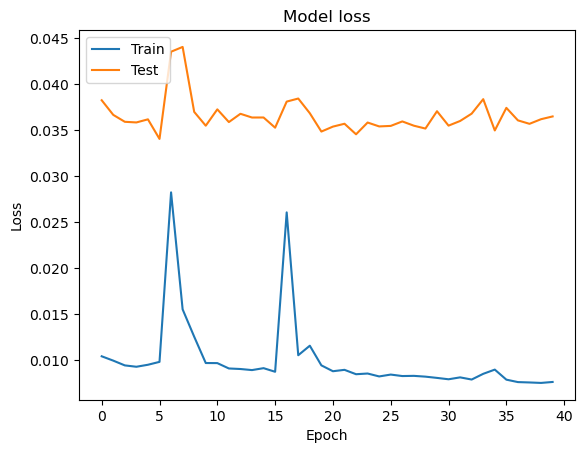

In [15]:
plt.plot(history.history['loss']), plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

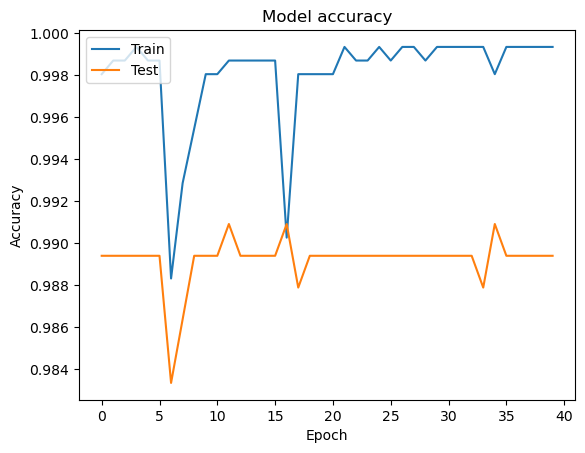

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score 

In [18]:
# Split the data into training and test sets
X=cropsDf.drop(['label'],axis=1)
y=cropsDf['label']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [20]:
import warnings
warnings.filterwarnings('ignore')
# Train a multiclass logistic regression model
clf = LogisticRegression(multi_class="ovr", solver="lbfgs")
clf.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [21]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9651515151515152


In [23]:
# Calculate recall
from sklearn.metrics import recall_score, f1_score, precision_score
print("Precision Score : ",precision_score(y_test, y_pred, average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred, average='macro'))

Precision Score :  0.9668206688093052
Recall Score :  0.9647025500209184


In [24]:
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score: ", f1)

F1 Score:  0.9649681174417786
